In [1]:
!pip install pycuda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 33.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 70 kB 9.8 MB/s 
  Created wheel for pycuda: filename=pycuda-2022.1-cp37-cp37m-linux_x86_64.whl size=629484 sha256=80b6cae48bbcabfc7b4f393d2ce30d21d9e4898f10c0f6ded67eb80272a20023
  Stored in directory: /root/.cache/pip/wheels/17/53/c9/caa05618e686df51f017d8a9923f38d915ce31df67ab6628e6
  Created wheel for pytools: filename=pytools-2022.1.12-py2.py3-none-any.whl size=65034 sha256=0836a36aecad0830ddf3265f812c18e01cd7aee0de64c3466e7e825a30a40046
  Stored in directory: /root/.cache/pip/wheels/37/5e/9e/76d7430e116b7cab0016fbabb26b896daae1946a3f7dea9915
Successfully built pycuda pytools


In [13]:
import pycuda.driver as cuda
import numpy         as np
import math

from time import time

import pycuda.autoinit

In [7]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/pyfiles')

from solver import MinimumEnergyControlSolver

Mounted at /content/drive


In [8]:
import matplotlib.pyplot as plt

## Case 1. learning_rate = 0.0001

In [18]:
x_des = np.array([0,0,0,0,0,0])

x_0 = np.array([100,0,-1500,-10,0,80])

upper_boundary = 5.0
downer_boundary = 0.0

lambdas = np.array([10,100])

t1 = time()

MECS = MinimumEnergyControlSolver(x_des, x_0, upper_boundary, downer_boundary, lambdas, learning_rate=1e-4)

opt_u, result = MECS.solve()

t2 = time()

print(f"runtime: {round(t2 - t1, 4)} s")

runtime: 0.5836 s


In [15]:
norm_u = np.zeros((300))

for i in range(300):
    norm_u[i] = np.linalg.norm(opt_u[3*i:3*i+3])

dt = 0.1
gravity = 1.62
A = \
np.array([[ 1, 0, 0,dt, 0, 0],
          [ 0, 1, 0, 0,dt, 0],
          [ 0, 0, 1, 0, 0,dt],
          [ 0, 0, 0, 1, 0, 0],
          [ 0, 0, 0, 0, 1, 0],
          [ 0, 0, 0, 0, 0, 1]])

## B
B = \
np.array([[0.5*dt*dt,        0,        0],
          [        0,0.5*dt*dt,        0],
          [        0,        0,0.5*dt*dt],
          [        dt,       0,        0],
          [        0,        dt,       0],
          [        0,        0,       dt]])

## g
g = \
np.array([[                0],
          [                0],
          [0.5*gravity*dt*dt],
          [                0],
          [                0],
          [       gravity*dt]])

state = np.zeros((6,300))
state[:,0] = x_0

for i in range(299):
    state[:,i+1] = np.dot(A, state[:,i]) + np.dot(B, opt_u[3*i:3*i+3]).T + g.T

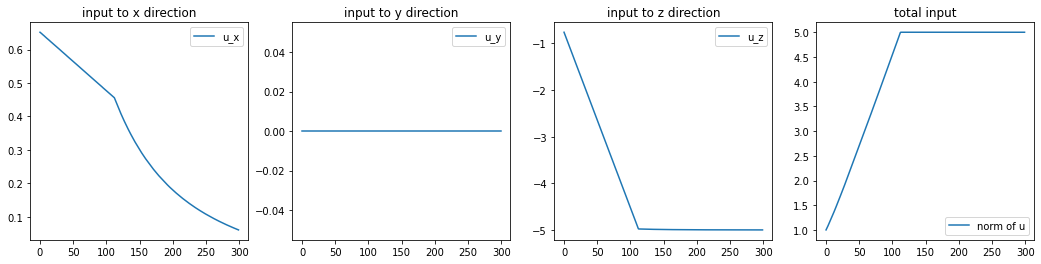

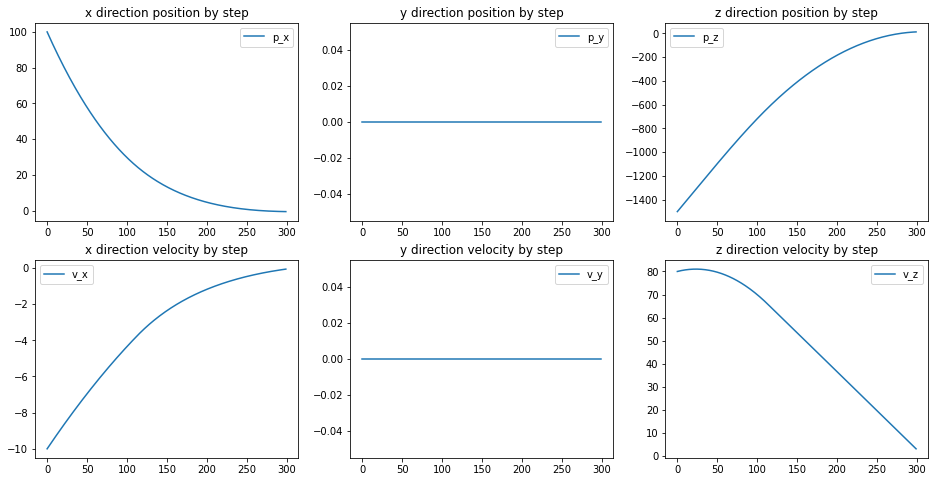

Last Point: [-0.5032  0.     11.7755 -0.0664  0.      3.1177]


In [16]:
plt.figure(figsize=(18,4))

plt.subplot(141)
plt.plot(opt_u[0::3], label="u_x")
plt.title("input to x direction")
plt.legend()

plt.subplot(142)
plt.plot(opt_u[1::3], label="u_y")
plt.title("input to y direction")
plt.legend()

plt.subplot(143)
plt.plot(opt_u[2::3], label="u_z")
plt.title("input to z direction")
plt.legend()

plt.subplot(144)
plt.plot(norm_u[:], label="norm of u")
plt.title("total input")
plt.legend()

plt.figure(figsize=(16,8))


plt.subplot(231)
plt.plot(state[0,:], label="p_x")
plt.title("x direction position by step")
plt.legend()

plt.subplot(232)
plt.plot(state[1,:], label="p_y")
plt.title("y direction position by step")
plt.legend()

plt.subplot(233)
plt.plot(state[2,:], label="p_z")
plt.title("z direction position by step")
plt.legend()

plt.subplot(234)
plt.plot(state[3,:], label="v_x")
plt.title("x direction velocity by step")
plt.legend()

plt.subplot(235)
plt.plot(state[4,:], label="v_y")
plt.title("y direction velocity by step")
plt.legend()

plt.subplot(236)
plt.plot(state[5,:], label="v_z")
plt.title("z direction velocity by step")
plt.legend()

plt.show()

print(f"Last Point: {np.round(state[:,-1], 4)}")

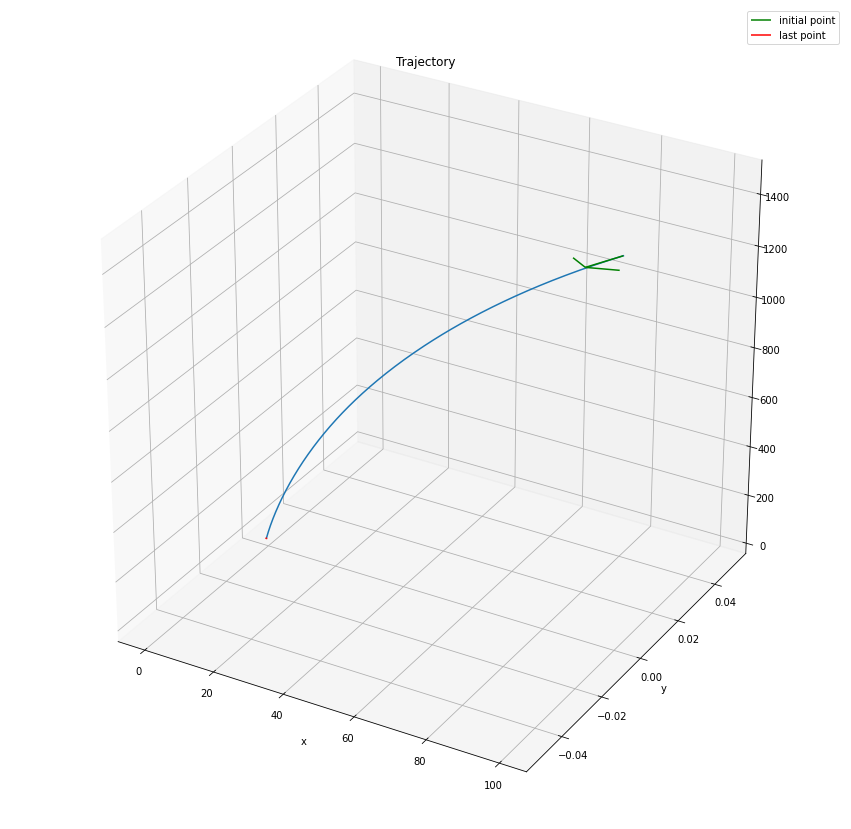

arrived at point: [-0.5032  0.     11.7755]
arrived with    : [-0.0664  0.      3.1177]


In [17]:
ax = plt.figure(figsize=(15,15)).add_subplot(projection="3d")

## initial point
ax.quiver(state[0,0], state[1,0], -state[2,0], state[3,0], state[4,0], -state[5,0], color="g", label="initial point")
ax.plot(state[0,:], state[1,:], -state[2,:])
ax.quiver(state[0,-1], state[1,-1], -state[2,-1], state[3,-1], state[4,-1], -state[5,-1], color="r", label="last point")

plt.title("Trajectory")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()

plt.show()

print(f"arrived at point: {np.round(state[:3,-1], 4)}")
print(f"arrived with    : {np.round(state[3:,-1], 4)}")

## Case 2. learning_rate = 0.001

In [27]:
x_des = np.array([0,0,0,0,0,0])

x_0 = np.array([100,0,-1500,-10,0,80])

upper_boundary = 5.8
downer_boundary = 0.0

lambdas = np.array([10,100])

t1 = time()

MECS = MinimumEnergyControlSolver(x_des, x_0, upper_boundary, downer_boundary, lambdas, learning_rate=1e-3)

opt_u, result = MECS.solve()

t2 = time()

print(f"runtime: {round(t2 - t1, 4)} s")

runtime: 0.1036 s


In [28]:
norm_u = np.zeros((300))

for i in range(300):
    norm_u[i] = np.linalg.norm(opt_u[3*i:3*i+3])

dt = 0.1
gravity = 1.62
A = \
np.array([[ 1, 0, 0,dt, 0, 0],
          [ 0, 1, 0, 0,dt, 0],
          [ 0, 0, 1, 0, 0,dt],
          [ 0, 0, 0, 1, 0, 0],
          [ 0, 0, 0, 0, 1, 0],
          [ 0, 0, 0, 0, 0, 1]])

## B
B = \
np.array([[0.5*dt*dt,        0,        0],
          [        0,0.5*dt*dt,        0],
          [        0,        0,0.5*dt*dt],
          [        dt,       0,        0],
          [        0,        dt,       0],
          [        0,        0,       dt]])

## g
g = \
np.array([[                0],
          [                0],
          [0.5*gravity*dt*dt],
          [                0],
          [                0],
          [       gravity*dt]])

state = np.zeros((6,300))
state[:,0] = x_0

for i in range(299):
    state[:,i+1] = np.dot(A, state[:,i]) + np.dot(B, opt_u[3*i:3*i+3]).T + g.T

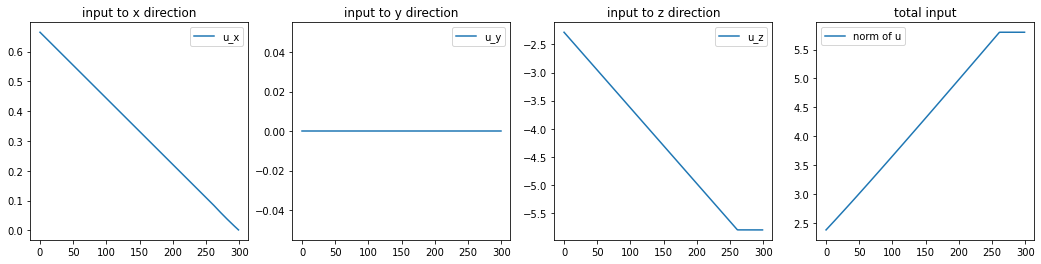

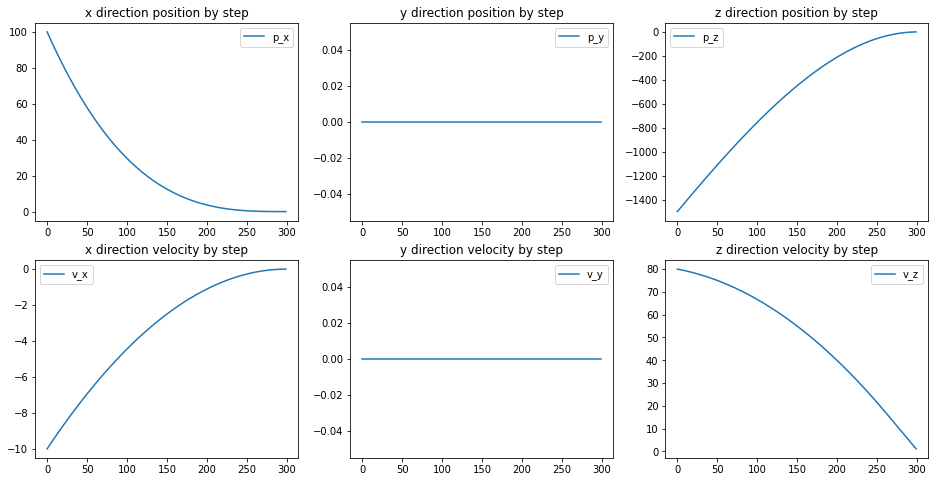

Last Point: [-2.3000e-02  0.0000e+00 -1.2540e-01 -7.0000e-04  0.0000e+00  1.1273e+00]


In [29]:
plt.figure(figsize=(18,4))

plt.subplot(141)
plt.plot(opt_u[0::3], label="u_x")
plt.title("input to x direction")
plt.legend()

plt.subplot(142)
plt.plot(opt_u[1::3], label="u_y")
plt.title("input to y direction")
plt.legend()

plt.subplot(143)
plt.plot(opt_u[2::3], label="u_z")
plt.title("input to z direction")
plt.legend()

plt.subplot(144)
plt.plot(norm_u[:], label="norm of u")
plt.title("total input")
plt.legend()

plt.figure(figsize=(16,8))


plt.subplot(231)
plt.plot(state[0,:], label="p_x")
plt.title("x direction position by step")
plt.legend()

plt.subplot(232)
plt.plot(state[1,:], label="p_y")
plt.title("y direction position by step")
plt.legend()

plt.subplot(233)
plt.plot(state[2,:], label="p_z")
plt.title("z direction position by step")
plt.legend()

plt.subplot(234)
plt.plot(state[3,:], label="v_x")
plt.title("x direction velocity by step")
plt.legend()

plt.subplot(235)
plt.plot(state[4,:], label="v_y")
plt.title("y direction velocity by step")
plt.legend()

plt.subplot(236)
plt.plot(state[5,:], label="v_z")
plt.title("z direction velocity by step")
plt.legend()

plt.show()

print(f"Last Point: {np.round(state[:,-1], 4)}")

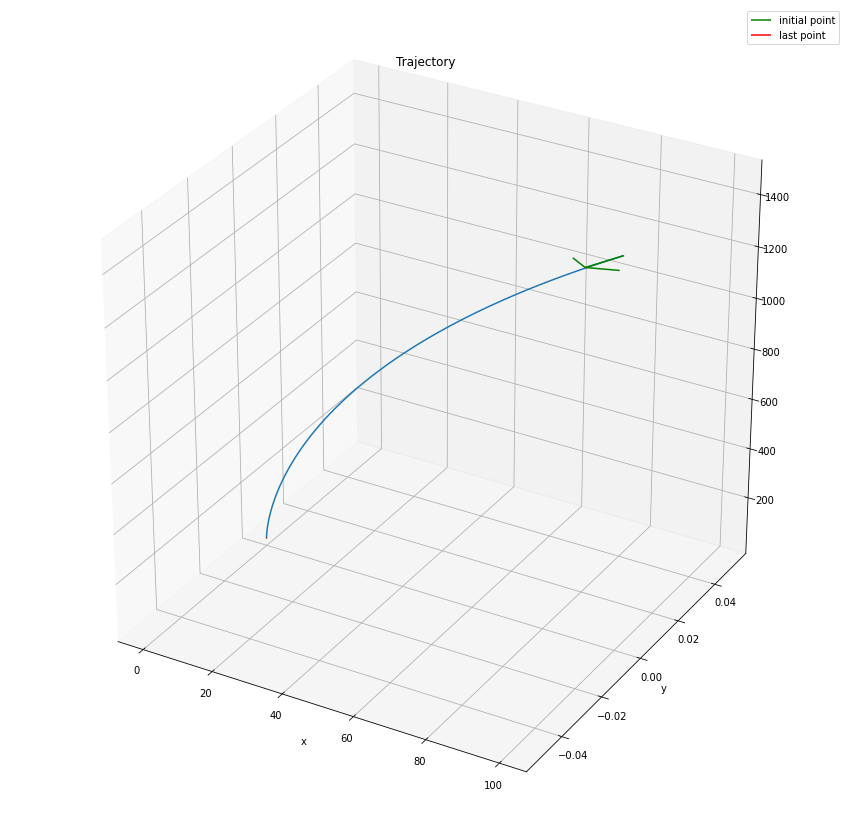

arrived at point: [-0.023   0.     -0.1254]
arrived with    : [-7.0000e-04  0.0000e+00  1.1273e+00]


In [30]:
ax = plt.figure(figsize=(15,15)).add_subplot(projection="3d")

## initial point
ax.quiver(state[0,0], state[1,0], -state[2,0], state[3,0], state[4,0], -state[5,0], color="g", label="initial point")
ax.plot(state[0,:], state[1,:], -state[2,:])
ax.quiver(state[0,-1], state[1,-1], -state[2,-1], state[3,-1], state[4,-1], -state[5,-1], color="r", label="last point")

plt.title("Trajectory")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()

plt.show()

print(f"arrived at point: {np.round(state[:3,-1], 4)}")
print(f"arrived with    : {np.round(state[3:,-1], 4)}")